# Setup Libraries

Needed in google colab

In [1]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 10.2 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
#import matplotlib.mlab as mlab 
%matplotlib inline

# statistical calculation
#from scipy.stats import norm

import datetime as dt # For defining dates

import time

import yfinance as yf

# Get Stock Data

In [3]:
all_stocks = ["^GSPC", "^FTLC", "^RUT", "IEUS", "GOVT", "IGOV", "SIVR", "SGOL"]

In [4]:
def get_all_closes_of_stocks(tickers):
  i = 0
  stock_list = pd.DataFrame()
  for ticker in tickers:
    stock = yf.Ticker(ticker)        
    data = stock.history(start="2012-02-24",end ="2022-02-25")
    data.drop(data.columns[[0,1,2,4,5,6]], axis=1, inplace=True) # Just gets the adjacent close for each asset
    data.columns = [ticker]
    stock_list[ticker] = data.iloc[:,0]
  return stock_list.dropna()
stock_data = get_all_closes_of_stocks(all_stocks)
print(stock_data)

                  ^GSPC        ^FTLC         ^RUT       IEUS       GOVT  \
Date                                                                      
2012-02-24  1365.739990  3144.399902   826.919983  27.285173  21.551910   
2012-02-27  1367.589966  3133.399902   826.659973  27.201174  21.551910   
2012-02-28  1372.180054  3141.199951   823.799988  27.445543  21.551910   
2012-02-29  1365.680054  3112.399902   810.940002  27.155355  21.551910   
2012-03-01  1374.089966  3142.899902   815.219971  27.117172  21.551910   
...                 ...          ...          ...        ...        ...   
2022-02-17  4380.259766  4240.200195  2028.089966  63.590000  25.511515   
2022-02-18  4348.870117  4222.799805  2009.329956  62.840000  25.571404   
2022-02-22  4304.759766  4201.799805  1980.170044  61.560001  25.581383   
2022-02-23  4225.500000  4198.799805  1944.089966  60.889999  25.461611   
2022-02-24  4288.700195  4042.899902  1996.010010  60.000000  25.471592   

                 IGOV   

# Hidden Markov Model

## Setup libaries

In [138]:
pip install hmmlearn

In [139]:
import itertools
from tqdm import tqdm
from hmmlearn.hmm import MultinomialHMM
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import r2_score

## Model setup

In [140]:
stock = yf.Ticker("^GSPC")
data = stock.history(start="2012-02-24",end="2022-02-25")
test_data = data.iloc[-252:]
data = data.iloc[:-252]

In [141]:
data.drop(data.columns[[4,5,6]], axis=1, inplace=True)
data

,Open,High,Low,Close
Date,,,,
2012-02-24,1363.459961,1368.920044,1363.459961,1365.739990
2012-02-27,1365.199951,1371.939941,1354.920044,1367.589966
2012-02-28,1367.560059,1373.089966,1365.969971,1372.180054
2012-02-29,1372.199951,1378.040039,1363.810059,1365.680054
2012-03-01,1365.900024,1376.170044,1365.900024,1374.089966
...,...,...,...,...
2021-02-19,3921.159912,3930.409912,3903.070068,3906.709961
2021-02-22,3885.550049,3902.919922,3874.709961,3876.500000
2021-02-23,3857.070068,3895.979980,3805.590088,3881.370117


In [142]:
daily_stock_data = data.pct_change().dropna()

In [143]:
daily_stock_data.shape

(2265, 4)

## Make Predictions for Individual Stocks

In [144]:
test_dates = training_data = stock_data.iloc[(-253):, 0:1].pct_change().dropna()

In [145]:
test_dates

,^GSPC
Date,
2021-02-04,0.010853
2021-02-05,0.003897
2021-02-08,0.007399
2021-02-09,-0.001114
2021-02-10,-0.000345
...,...
2022-02-17,-0.021173
2022-02-18,-0.007166
2022-02-22,-0.010143


In [146]:
training_data = stock_data.iloc[:-252].pct_change().dropna()

In [147]:
training_data

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
Date,,,,,,,,
2012-02-27,0.001355,-0.003498,-0.000314,-0.003079,0.000000,-0.001189,-0.000285,-0.003132
2012-02-28,0.003356,0.002489,-0.003460,0.008984,0.000000,0.007836,0.043020,0.010512
2012-02-29,-0.004737,-0.009168,-0.015611,-0.010573,0.000000,-0.004921,-0.064736,-0.053030
2012-03-01,0.006158,0.009800,0.005278,-0.001406,0.000000,-0.019891,0.027453,0.014149
2012-03-02,-0.003246,-0.002895,-0.015701,-0.002253,0.000000,-0.007479,-0.020182,-0.001766
...,...,...,...,...,...,...,...,...
2021-01-27,-0.025678,-0.012199,-0.019146,-0.026092,0.001103,-0.003997,-0.009756,-0.006180
2021-01-29,-0.009739,-0.020476,-0.016626,0.003389,-0.003307,-0.001277,0.066092,0.000565
2021-02-01,0.016052,0.009006,0.025327,0.012064,0.000775,-0.006210,0.072006,0.008475


In [148]:
days = np.array(test_dates.reset_index()['Date'], dtype="datetime64[ms]")
days

array(['2021-02-04T00:00:00.000', '2021-02-05T00:00:00.000',
       '2021-02-08T00:00:00.000', '2021-02-09T00:00:00.000',
       '2021-02-10T00:00:00.000', '2021-02-11T00:00:00.000',
       '2021-02-12T00:00:00.000', '2021-02-16T00:00:00.000',
       '2021-02-18T00:00:00.000', '2021-02-19T00:00:00.000',
       '2021-02-22T00:00:00.000', '2021-02-23T00:00:00.000',
       '2021-02-24T00:00:00.000', '2021-02-25T00:00:00.000',
       '2021-02-26T00:00:00.000', '2021-03-01T00:00:00.000',
       '2021-03-02T00:00:00.000', '2021-03-04T00:00:00.000',
       '2021-03-05T00:00:00.000', '2021-03-08T00:00:00.000',
       '2021-03-09T00:00:00.000', '2021-03-10T00:00:00.000',
       '2021-03-11T00:00:00.000', '2021-03-15T00:00:00.000',
       '2021-03-16T00:00:00.000', '2021-03-17T00:00:00.000',
       '2021-03-18T00:00:00.000', '2021-03-19T00:00:00.000',
       '2021-03-22T00:00:00.000', '2021-03-23T00:00:00.000',
       '2021-03-24T00:00:00.000', '2021-03-25T00:00:00.000',
       '2021-03-26T00:00

In [149]:
all_samples = []
for close in training_data:
  print(close)
  hmm = GaussianHMM(n_components=4)
  #print(pd.DataFrame(training_data[close]))
  hmm.fit(pd.DataFrame(training_data[close]))
  samples, _ = hmm.sample(252)
  if len(all_samples)==0:
    test_dates[close] = samples
    all_samples = pd.DataFrame( test_dates[close], index=days)
  else:
    all_samples[close] = samples
print(all_samples)

^GSPC
^FTLC
^RUT
IEUS
GOVT
IGOV
SIVR
SGOL
               ^GSPC     ^FTLC      ^RUT      IEUS      GOVT      IGOV  \
2021-02-04 -0.010307  0.007558  0.013225 -0.011663  0.000767  0.003214   
2021-02-05  0.007197  0.009218 -0.001597 -0.003947 -0.001431  0.002831   
2021-02-08  0.002876  0.009048  0.006321 -0.011854 -0.000963 -0.003745   
2021-02-09  0.000985  0.004728 -0.011199 -0.004659  0.003468  0.003281   
2021-02-10  0.001214  0.069803  0.000681  0.009745  0.004562 -0.002624   
...              ...       ...       ...       ...       ...       ...   
2022-02-17  0.009361  0.006727 -0.005631  0.007611  0.003904 -0.000497   
2022-02-18  0.001717  0.014321 -0.015088  0.011493  0.007274 -0.001274   
2022-02-22 -0.004819  0.006589 -0.027943  0.000711 -0.008312 -0.007245   
2022-02-23 -0.001432  0.003649  0.005201  0.012505  0.003869 -0.012937   
2022-02-24  0.000785  0.001777 -0.014113  0.001266  0.017552  0.004139   

                SIVR      SGOL  
2021-02-04  0.004775 -0.006643  
202

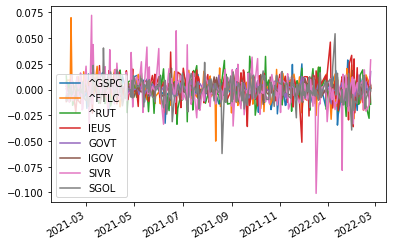

In [150]:
all_samples.plot()

## Calculating the resulting stock price change using cumilative product

In [151]:
stock_data.iloc[-253:-252,:] #Gets the stock prices for the last day of the training data

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
Date,,,,,,,,
2021-02-03,3830.169922,3728.5,2159.699951,62.261761,26.677723,54.029949,25.92,17.620001


In [152]:
all_samples

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
2021-02-04,-0.010307,0.007558,0.013225,-0.011663,0.000767,0.003214,0.004775,-0.006643
2021-02-05,0.007197,0.009218,-0.001597,-0.003947,-0.001431,0.002831,-0.006994,-0.011162
2021-02-08,0.002876,0.009048,0.006321,-0.011854,-0.000963,-0.003745,-0.012379,0.000228
2021-02-09,0.000985,0.004728,-0.011199,-0.004659,0.003468,0.003281,-0.003643,-0.004354
2021-02-10,0.001214,0.069803,0.000681,0.009745,0.004562,-0.002624,0.004535,0.003847
...,...,...,...,...,...,...,...,...
2022-02-17,0.009361,0.006727,-0.005631,0.007611,0.003904,-0.000497,0.005502,-0.018500
2022-02-18,0.001717,0.014321,-0.015088,0.011493,0.007274,-0.001274,-0.020951,-0.009638
2022-02-22,-0.004819,0.006589,-0.027943,0.000711,-0.008312,-0.007245,-0.015007,0.001138
2022-02-23,-0.001432,0.003649,0.005201,0.012505,0.003869,-0.012937,0.010813,0.002934


In [153]:
plus_samples = 1 +all_samples

In [154]:
plus_samples.iloc[0:1,:].reset_index()
plus_samples

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
2021-02-04,0.989693,1.007558,1.013225,0.988337,1.000767,1.003214,1.004775,0.993357
2021-02-05,1.007197,1.009218,0.998403,0.996053,0.998569,1.002831,0.993006,0.988838
2021-02-08,1.002876,1.009048,1.006321,0.988146,0.999037,0.996255,0.987621,1.000228
2021-02-09,1.000985,1.004728,0.988801,0.995341,1.003468,1.003281,0.996357,0.995646
2021-02-10,1.001214,1.069803,1.000681,1.009745,1.004562,0.997376,1.004535,1.003847
...,...,...,...,...,...,...,...,...
2022-02-17,1.009361,1.006727,0.994369,1.007611,1.003904,0.999503,1.005502,0.981500
2022-02-18,1.001717,1.014321,0.984912,1.011493,1.007274,0.998726,0.979049,0.990362
2022-02-22,0.995181,1.006589,0.972057,1.000711,0.991688,0.992755,0.984993,1.001138
2022-02-23,0.998568,1.003649,1.005201,1.012505,1.003869,0.987063,1.010813,1.002934


In [155]:
last_stock_price = stock_data.iloc[-253:-252,:].reset_index().drop("Date", axis=1)
last_stock_price

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
0,3830.169922,3728.5,2159.699951,62.261761,26.677723,54.029949,25.92,17.620001


In [156]:
Cumulative_returns_daily = (plus_samples).cumprod().dropna()
print(Cumulative_returns_daily.dropna())
#print(plus_samples.cumprod())

               ^GSPC     ^FTLC      ^RUT      IEUS      GOVT      IGOV  \
2021-02-04  0.989693  1.007558  1.013225  0.988337  1.000767  1.003214   
2021-02-05  0.996816  1.016845  1.011607  0.984436  0.999335  1.006054   
2021-02-08  0.999682  1.026045  1.018001  0.972767  0.998373  1.002286   
2021-02-09  1.000667  1.030896  1.006600  0.968234  1.001835  1.005575   
2021-02-10  1.001882  1.102856  1.007286  0.977670  1.006405  1.002937   
...              ...       ...       ...       ...       ...       ...   
2022-02-17  1.182365  1.029796  0.996858  1.388157  1.026781  0.923769   
2022-02-18  1.184395  1.044543  0.981818  1.404111  1.034251  0.922593   
2022-02-22  1.178687  1.051425  0.954383  1.405109  1.025654  0.915909   
2022-02-23  1.177000  1.055262  0.959347  1.422679  1.029622  0.904060   
2022-02-24  1.177924  1.057138  0.945808  1.424480  1.047693  0.907802   

                SIVR      SGOL  
2021-02-04  1.004775  0.993357  
2021-02-05  0.997747  0.982270  
2021-02-08  

In [157]:
last_stock_price

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
0,3830.169922,3728.5,2159.699951,62.261761,26.677723,54.029949,25.92,17.620001


In [158]:
stock_prices = Cumulative_returns_daily * last_stock_price.iloc[0,:]
stock_prices

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
2021-02-04,3790.694239,3756.678437,2188.261628,61.535610,26.698188,54.203625,26.043756,17.502960
2021-02-05,3817.974001,3791.306064,2184.767742,61.292744,26.659971,54.357052,25.861614,17.307597
2021-02-08,3828.953029,3825.608316,2198.577272,60.566185,26.634307,54.153486,25.541471,17.311550
2021-02-09,3832.723807,3843.696412,2173.954691,60.283981,26.726673,54.331180,25.448421,17.236175
2021-02-10,3837.377580,4111.997516,2175.435051,60.871454,26.848596,54.188611,25.563830,17.302485
...,...,...,...,...,...,...,...,...
2022-02-17,4528.657177,3839.594451,2152.915089,86.429069,27.392191,49.911218,22.960268,16.563178
2022-02-18,4536.433338,3894.579985,2120.432616,87.422395,27.591451,49.847639,22.479216,16.403535
2022-02-22,4514.572591,3920.239647,2061.181538,87.484551,27.362102,49.486496,22.141870,16.422210
2022-02-23,4508.109098,3934.544249,2071.900790,88.578521,27.467962,48.846292,22.381287,16.470390


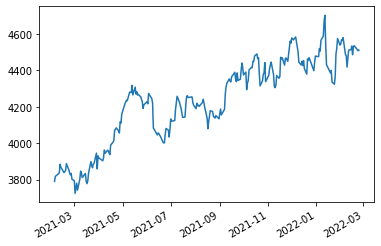

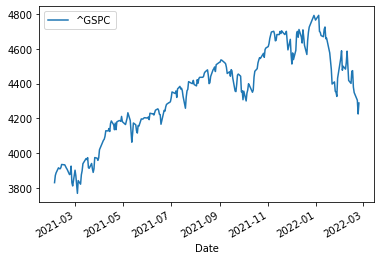

In [159]:
stock_prices["^GSPC"].plot()
stock_data.iloc[-253:,0:1].plot()

## Calculating stock price individually for plotting purposes

[-0.01116167]
4112.9385359720545
-0.31220730661010476


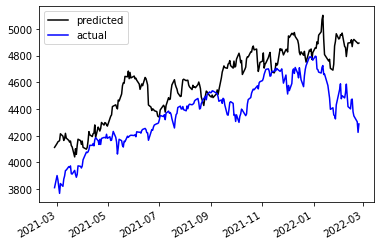

In [160]:
open_price = test_data.iloc[-1,0]
#print(last_close_value)
print(samples[1,:])
print(open_price * (1 + all_samples.iloc[0,0])) # =closing value
closing_samples = []
closing_samples = np.array(closing_samples)
i = 0
for sample in all_samples.iloc[:,0]:
  if i == 0:
    closing_samples = np.append(closing_samples, (open_price * (1 + sample)))
  else:
    closing_samples = np.append(closing_samples, (closing_samples[i-1] * (1 + sample)))
  i += 1
days = np.array(test_data.reset_index()['Date'], dtype="datetime64[ms]")
print(r2_score(test_data["Close"],closing_samples))
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(days, closing_samples, c="black", label="predicted")
axes.plot(days, test_data["Close"], c="blue", label="actual")
fig.autofmt_xdate()
plt.legend()
plt.show()

# Creating the Mean-Variance Portfolio Using the HMM Prediction

In [161]:
pip install PyPortfolioOpt

In [162]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


mu = mean_historical_return(stock_prices)
S = CovarianceShrinkage(stock_prices).ledoit_wolf()

from pypfopt.efficient_frontier import EfficientFrontier 

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() # This gets rid of most of the assets

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))
ef.portfolio_performance(verbose=True)

{'^GSPC': 0.37874, '^FTLC': 0.04216, '^RUT': 0.0, 'IEUS': 0.5363, 'GOVT': 0.0428, 'IGOV': 0.0, 'SIVR': 0.0, 'SGOL': 0.0}
Expected annual return: 31.4%
Annual volatility: 11.2%
Sharpe Ratio: 2.62


(0.3142327785500421, 0.11227031704998751, 2.620753074198919)

## Format the Weights for Further Use

In [163]:
print(dict(cleaned_weights))

{'^GSPC': 0.37874, '^FTLC': 0.04216, '^RUT': 0.0, 'IEUS': 0.5363, 'GOVT': 0.0428, 'IGOV': 0.0, 'SIVR': 0.0, 'SGOL': 0.0}


In [164]:
tmp_list = []
for value, key in dict(cleaned_weights).items():
  tmp_list.append(key)

portfolio_weights = pd.Series(tmp_list, index=all_stocks)
portfolio_weights

^GSPC    0.37874
^FTLC    0.04216
^RUT     0.00000
IEUS     0.53630
GOVT     0.04280
IGOV     0.00000
SIVR     0.00000
SGOL     0.00000
dtype: float64

# Test Year

In [165]:
initial_investment = 10000 # 10'000 dollar invesment. Can Change to 100'000 later 
trading_year = 252 # Number of trading days in a year
stock_returns = stock_data.pct_change() 

In [166]:
weighted_portfolio = portfolio_weights * initial_investment # Calculate the dollars invested in each asset in the portfolio
num_of_shares = weighted_portfolio / stock_data.iloc[(-trading_year),:] # Calculate the number of shares owned of each asset in the portfolio
portfolio_test_values = num_of_shares * stock_data.iloc[(-trading_year):,:] # share * share price = position value and it is done for each day in the trading year for all assets
portfolio_test_values['Total'] = portfolio_test_values.sum(axis=1)
portfolio_test_values 

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL,Total
Date,,,,,,,,,
2021-02-04,3787.400000,421.600000,0.0,5363.000000,428.000000,0.0,0.0,0.0,10000.000000
2021-02-05,3802.161373,421.780931,0.0,5419.099807,427.365248,0.0,0.0,0.0,10070.407358
2021-02-08,3830.294890,423.669277,0.0,5448.405764,427.523997,0.0,0.0,0.0,10129.893928
2021-02-09,3826.029761,424.189406,0.0,5473.525530,427.841312,0.0,0.0,0.0,10151.586008
2021-02-10,3824.709073,423.375271,0.0,5448.405764,428.634814,0.0,0.0,0.0,10125.124922
...,...,...,...,...,...,...,...,...,...
2022-02-17,4284.842442,479.460481,0.0,5465.436753,409.593617,0.0,0.0,0.0,10639.333293
2022-02-18,4254.136570,477.492932,0.0,5400.975713,410.555147,0.0,0.0,0.0,10543.160362
2022-02-22,4210.987096,475.118358,0.0,5290.962309,410.715366,0.0,0.0,0.0,10387.783128


### Plot the portfolio

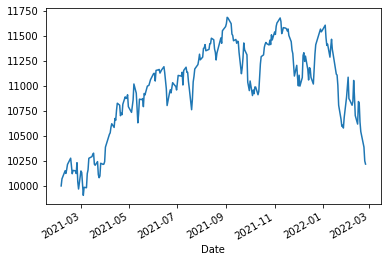

In [167]:
portfolio_test_values['Total'].plot() # Need to pretty this up for the dssertation or not use it at all

### Plot the Individual Assets

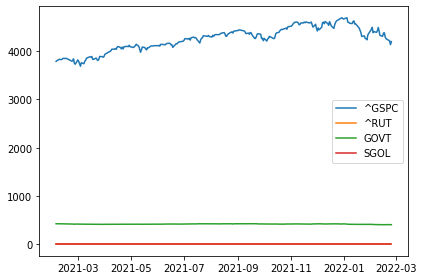

In [168]:
# Plotted on the same graph to see general trend
figure = plt.figure()
axis = plt.plot(portfolio_test_values.iloc[:,0:1], label='^GSPC')
#axis = plt.plot(portfolio_test_values.iloc[:,1:2], label='^FTLC')
axis = plt.plot(portfolio_test_values.iloc[:,2:3], label='^RUT')
#axis = plt.plot(portfolio_test_values.iloc[:,3:4], label='IEUS')

axis = plt.plot(portfolio_test_values.iloc[:,4:5], label='GOVT')
#axis = plt.plot(portfolio_test_values.iloc[:,5:6], label='IGOV')
#axis = plt.plot(portfolio_test_values.iloc[:,6:7], label='SIVR')
axis = plt.plot(portfolio_test_values.iloc[:,7:8], label='SGOL')
plt.tight_layout()
plt.legend()
plt.show()

# Analyse the Test Year

## Sharpe Ratio

^GSPC    0.775173
^FTLC    0.693307
IEUS    -0.162606
GOVT    -0.831363
Total    0.227708
dtype: float64

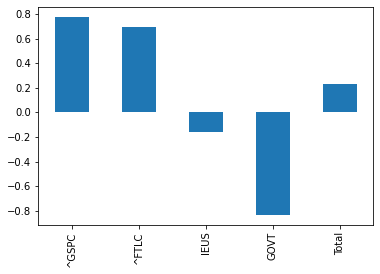

In [187]:
#daily_stock_returns = portfolio_position_values.pct_change().dropna() # Analysing holding such portfolio position from the start
daily_stock_returns = portfolio_test_values.pct_change()
daily_stock_returns.drop(daily_stock_returns.columns[[2,5,6,7]], axis=1, inplace=True)
daily_stock_returns = daily_stock_returns.dropna()
#print(daily_stock_returns)
# To calculate sharpie ratio for individual stocks 
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 252 #252 trading days in a year
rf = 0 #I assume this to be 0 in my dissertation due to there not being a trully risk free asset
sharpes = daily_stock_returns.apply(sharpe_ratio, args=(N,rf,),axis=0)
sharpes.plot.bar()
sharpes

## Volatility

### Individual Stock Volatility

#### Rolling Volatilty for Each stock

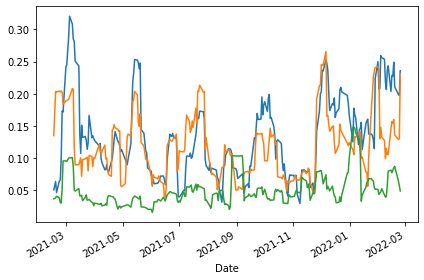

In [188]:
#data = portfolio_position_values.pct_change().dropna() # Analysing holding such portfolio position from the start
rolling_stock = pd.DataFrame()
daily_stock_returns = portfolio_test_values.pct_change()
daily_stock_returns.drop(daily_stock_returns.columns[[2,5,6,7]], axis=1, inplace=True)
data = daily_stock_returns.dropna()
#print(data)
for stock in ["^GSPC","^FTLC","GOVT","IEUS", "Total"]:
  rolling_stock[stock] = data[stock].rolling(7).std()*(252**0.5)
f1 = plt.figure()
for i in range(0,3):
  rolling_stock.iloc[:,i].plot()
  plt.tight_layout()
  #plt.show() # To display in separate graphs instead of 1

#### Anualised volatility for Each Stock

In [189]:
#data = portfolio_position_values.pct_change().dropna() # Analysing holding such portfolio position from the start
stock_volatility = pd.DataFrame()
daily_stock_returns = portfolio_test_values.pct_change()
daily_stock_returns.drop(daily_stock_returns.columns[[2,5,6,7]], axis=1, inplace=True)
data = daily_stock_returns.dropna()
tmp = pd.DataFrame()
i = 0 
for stock in ["^GSPC","^RUT","GOVT","SGOL", "Total"]:
  tmp[stock] = data.iloc[:,i:(i+1)]
  stock_volatility = tmp.std()*(252**0.5)
  i = i + 1
print(stock_volatility)

^GSPC    0.146273
^RUT     0.129323
GOVT     0.161712
SGOL     0.053270
Total    0.135348
dtype: float64


### Portfolio Volatility

#### Just the Anualised Volatility for the Portfolio

In [190]:
total_portfolio_change = portfolio_test_values['Total'].pct_change().dropna()
portfolio_vol = total_portfolio_change.std()*(252**0.5)
portfolio_vol

0.13534837315954762

## Maximum Drawdown

^GSPC   -0.118501
^FTLC   -0.065139
IEUS    -0.187752
GOVT    -0.053062
Total   -0.125477
dtype: float64

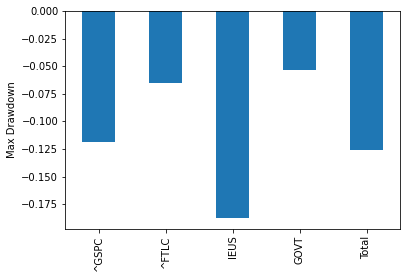

In [191]:
def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()

daily_stock_returns = portfolio_test_values.pct_change()
daily_stock_returns.drop(daily_stock_returns.columns[[2,5,6,7]], axis=1, inplace=True)
daily_stock_returns = daily_stock_returns.dropna()
max_drawdowns = daily_stock_returns.apply(max_drawdown,axis=0)
max_drawdowns.plot.bar()
plt.ylabel('Max Drawdown')
max_drawdowns

## Compound Annual Growth Rate (CARG)

In [192]:
start_value = portfolio_test_values.iloc[0,:]
end_value = portfolio_test_values.iloc[-1,:]
number_of_years =  round(len(portfolio_test_values)/252)
CARG = (((end_value / start_value) ** (1/number_of_years)) -1)# Shows % of values
CARG

^GSPC    0.107693
^FTLC    0.084323
^RUT          NaN
IEUS    -0.038433
GOVT    -0.044503
IGOV          NaN
SIVR          NaN
SGOL          NaN
Total    0.021826
dtype: float64

## Calmar Ratio

^GSPC    0.968235
^FTLC    1.392832
IEUS    -0.141721
GOVT    -0.844546
Total    0.248546
dtype: float64

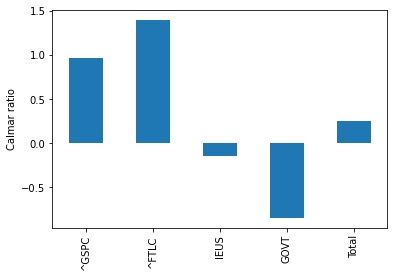

In [193]:
#daily_stock_returns = portfolio_position_values.pct_change().dropna() # Analysing holding such portfolio position from the start
daily_stock_returns = portfolio_test_values.pct_change()
daily_stock_returns.drop(daily_stock_returns.columns[[2,5,6,7]], axis=1, inplace=True)
daily_stock_returns = daily_stock_returns.dropna()
calmars = daily_stock_returns.mean()*255/abs(max_drawdowns)

calmars.plot.bar()
plt.ylabel('Calmar ratio')
calmars

## Value at Risk? Haven't decided if I want to include this or not

# Export Test Year to CSV

In [194]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [195]:
portfolio_test_values.to_csv('HiddenMarkovModelData.csv')

In [196]:
portfolio_weights.to_csv('HiddenMarkovModelWeights.csv')

In [197]:
!cp HiddenMarkovModelWeights.csv "drive/My Drive/DisData"

In [198]:
!cp HiddenMarkovModelData.csv "drive/My Drive/DisData"